In [1]:
!pip install watson-machine-learning-client


     ------------------------------------ 538.9/538.9 kB 663.3 kB/s eta 0:00:00
     -------------------------------------- 55.6/55.6 kB 966.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 132.5/132.5 kB 873.0 kB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 79.6/79.6 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 956.8/956.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 135.7/135.7 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 247.7/247.7 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 140.4/140.4

In [4]:
from ibm_watson_machine_learning import APIClient
wml_credentials={ 
                    "url":"https://us-south.ml.cloud.ibm.com",
                    "apikey":"QXdS9eYZqw3SK9Cvz9QV34qVW2O-V7DEBJ9Hpe1B39gO"
                }
client=APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [5]:
client=APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [6]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [7]:
space_uid=guid_from_space_name(client,'fruit_tarining')
print("Space UID = "+space_uid)

Space UID = eaf8b765-a737-4fa1-84a1-f3ac6103e7d9


In [8]:
client.set.default_space(space_uid)

'SUCCESS'

In [9]:
client.repository.download('c9ec4900-a382-4fab-addd-b534376fc98d',"my_model.tar.gz")

Successfully saved model content to file: 'my_model.tar.gz'


'C:\\Users\\Admin/my_model.tar.gz'

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

In [44]:
model=load_model('fruit1.h5')

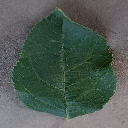

In [50]:
img=image.load_img('apple1.jpg',target_size=(128,128))
img

In [51]:
import numpy as np
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [52]:
x.shape

(1, 128, 128, 3)

In [53]:
pred=model.predict(x)

In [54]:
pred[0]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [57]:
disease=["Apple Black Rot","Apple Healthy","Corn Healthy","Corn Northern Leaf Blight","Peach Bacterial Spot","Peach Healthy"]
#print(disease[pred[0]])
disease[np.where(pred[0]==1)[0][0]]

'Apple Healthy'